<a href="https://colab.research.google.com/github/mayurikb/Petrol-Consumption/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [4]:
iris_data = load_iris()

In [5]:
iris_data.data.shape

(150, 4)

In [6]:
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [7]:
print("Classes to predict: ", iris_data.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [8]:
X = iris_data.data
y = iris_data.target

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print("Training Accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))


Training Accuracy:  1.0
Test Accuracy:  0.9736842105263158


In [15]:
clf_entropy = DecisionTreeClassifier(criterion="entropy")

In [16]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
y_pred = clf_entropy.predict(X_test)

In [18]:
print("Training Accuracy (Entropy): ", accuracy_score(y_train, clf_entropy.predict(X_train)))
print("Test Accuracy (Entropy): ", accuracy_score(y_test, y_pred))

Training Accuracy (Entropy):  1.0
Test Accuracy (Entropy):  0.9736842105263158


In [19]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", min_samples_split=50)

In [20]:
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
y_pred = clf_entropy.predict(X_test)

In [22]:
print("Training Accuracy: ", accuracy_score(y_train, clf_entropy.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Training Accuracy:  0.9642857142857143
Test Accuracy:  0.8947368421052632


In [23]:
from sklearn import tree

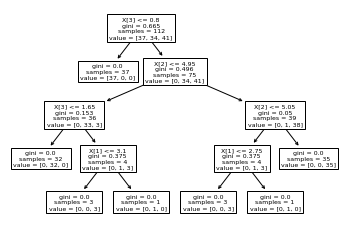

In [24]:
import matplotlib.pyplot as plt
tree.plot_tree(clf)
plt.show()

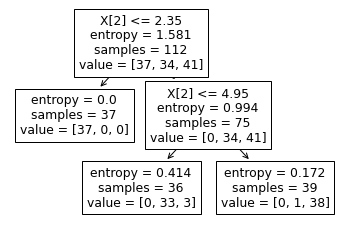

In [25]:
tree.plot_tree(clf_entropy)
plt.show()

In [26]:
!pip install graphviz
!pip install pyparsing
!pip install pydotplus

In [27]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
 
dot_data = export_graphviz(clf, filled=True, rounded=True,
                                    class_names=iris_data.target_names,
                                    feature_names=iris_data.feature_names,
                                    out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True